In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 10]


import sys
sys.path.append('../../')
from src.utilities import load_serialized_object, data_path
from src.plot import plot_history

Using TensorFlow backend.


# UIUC

In [2]:
# Training time
models = ['vgg16', 'inceptionv3', 'resnet50']
for model in models:
    time_path = data_path('uiuc', '224_224', 'model', model, 'time.pkl')
    time = load_serialized_object(time_path)
    print('%s:' % model + '{}:{}'.format(*divmod(time, 60)))

vgg16:1:15
inceptionv3:2:9
resnet50:0:23


In [23]:
def plot_history(vgg16_history, resnet50_history, inceptionv3_history):
    plt.rcParams["figure.figsize"] = [15, 6]
    plt.rcParams["font.size"] = 12
    plt.plot(range(1, 1+len(vgg16_history['acc'])), vgg16_history['acc'], label='VGG16 Acc', color='r')
    plt.plot(range(1, 1+len(vgg16_history['val_acc'])), vgg16_history['val_acc'], label='VGG16 Val. Acc', linestyle='--', color='r')
    plt.plot(range(1, 1+len(inceptionv3_history['acc'])), inceptionv3_history['acc'], label='InceptionV3 Acc', color='g')
    plt.plot(range(1, 1+len(inceptionv3_history['val_acc'])), inceptionv3_history['val_acc'], label='InceptionV3 Val. Acc', linestyle='--', color='g')
    plt.plot(range(1, 1+len(resnet50_history['acc'])), resnet50_history['acc'], label='Resnet50 Acc', color='b')
    plt.plot(range(1, 1+len(resnet50_history['val_acc'])), resnet50_history['val_acc'], label='Resnet50 Val. Acc', linestyle='--', color='b')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

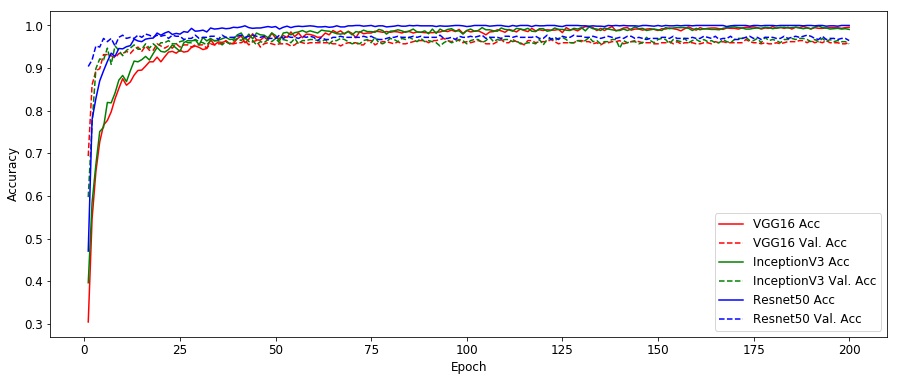

In [24]:
vgg16_history = load_serialized_object(data_path('uiuc', '224_224', 'model', 'vgg16', 'hist.pkl'))
resnet50_history = load_serialized_object(data_path('uiuc', '224_224', 'model', 'resnet50', 'hist.pkl'))
inceptionv3_history = load_serialized_object(data_path('uiuc', '224_224', 'model', 'inceptionv3', 'hist.pkl'))

plot_history(vgg16_history, resnet50_history, inceptionv3_history)

# Kaggle Dog vs Cat

In [5]:
# Training time
models = ['vgg16', 'inceptionv3', 'resnet50']
for model in models:
    time_path = data_path('kaggle_dog_cat', '224_224', 'model', model, 'time.pkl')
    time = load_serialized_object(time_path)
    print('%s:' % model + '{}:{}'.format(*divmod(time, 60)))

vgg16:18:33
inceptionv3:33:9
resnet50:5:37


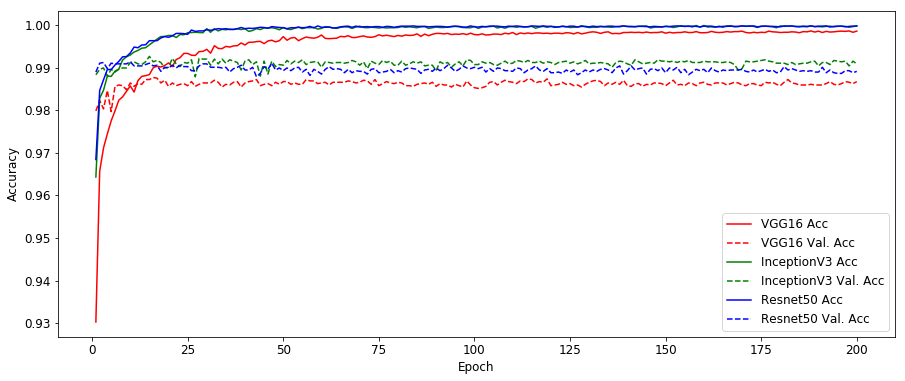

In [25]:
vgg16_history = load_serialized_object(data_path('kaggle_dog_cat', '224_224', 'model', 'vgg16', 'hist.pkl'))
resnet50_history = load_serialized_object(data_path('kaggle_dog_cat', '224_224', 'model', 'resnet50', 'hist.pkl'))
inceptionv3_history = load_serialized_object(data_path('kaggle_dog_cat', '224_224', 'model', 'inceptionv3', 'hist.pkl'))


plot_history(vgg16_history, resnet50_history, inceptionv3_history)

# Codalab Smile

In [7]:
# Training time
models = ['vgg16', 'inceptionv3', 'resnet50']
for model in models:
    time_path = data_path('codalab', '224_224', 'model', 'smile', model, 'time.pkl')
    time = load_serialized_object(time_path)
    print('%s:' % model + '{}:{}'.format(*divmod(time, 60)))

vgg16:6:20
inceptionv3:11:16
resnet50:2:0


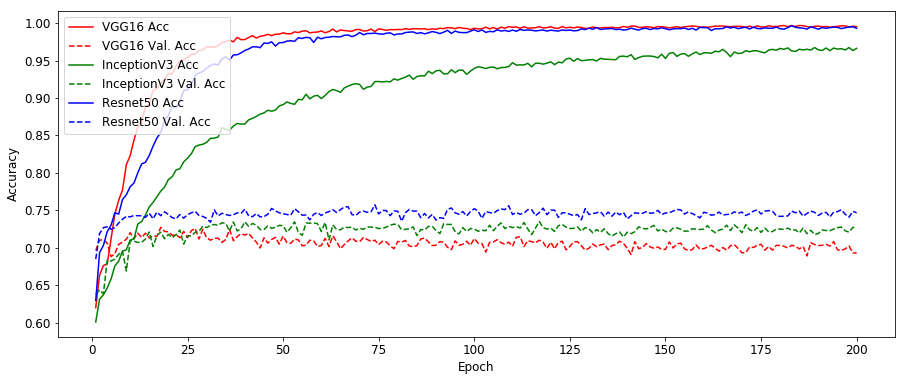

In [26]:
vgg16_history = load_serialized_object(data_path('codalab', '224_224', 'model', 'smile', 'vgg16', 'hist.pkl'))
resnet50_history = load_serialized_object(data_path('codalab', '224_224', 'model', 'smile', 'resnet50', 'hist.pkl'))
inceptionv3_history = load_serialized_object(data_path('codalab', '224_224', 'model', 'smile', 'inceptionv3', 'hist.pkl'))

plot_history(vgg16_history, resnet50_history, inceptionv3_history)

# Codalab Gender

In [9]:
# Training time
models = ['vgg16', 'inceptionv3', 'resnet50']
for model in models:
    time_path = data_path('codalab', '224_224', 'model', 'gender', model, 'time.pkl')
    time = load_serialized_object(time_path)
    print('%s:' % model + '{}:{}'.format(*divmod(time, 60)))

vgg16:6:18
inceptionv3:11:20
resnet50:2:3


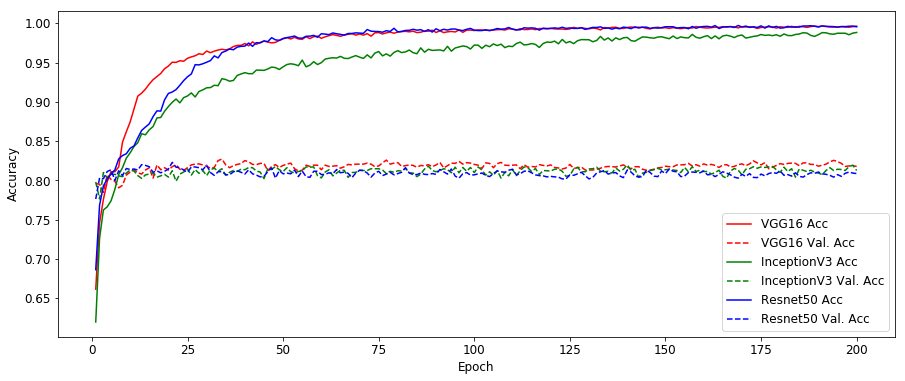

In [27]:
vgg16_history = load_serialized_object(data_path('codalab', '224_224', 'model', 'gender', 'vgg16', 'hist.pkl'))
resnet50_history = load_serialized_object(data_path('codalab', '224_224', 'model', 'gender', 'resnet50', 'hist.pkl'))
inceptionv3_history = load_serialized_object(data_path('codalab', '224_224', 'model', 'gender', 'inceptionv3', 'hist.pkl'))

plot_history(vgg16_history, resnet50_history, inceptionv3_history)

## Finetuning

GENDER
6 days, 19:34:18
0.828580687012
loss


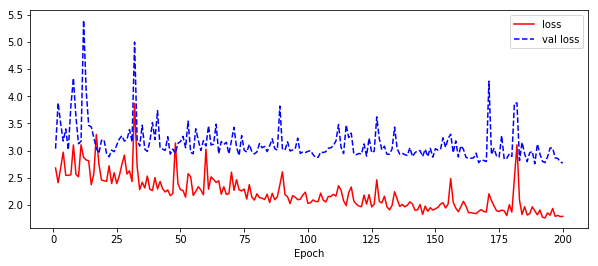

acc


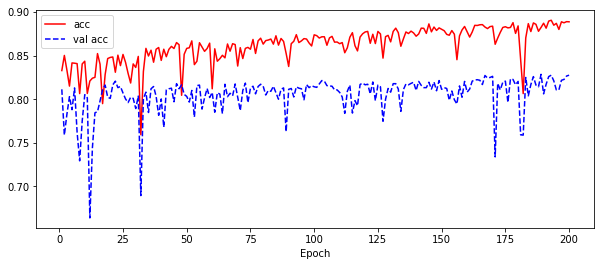

SMILE
6 days, 19:42:27
0.769280622087
loss


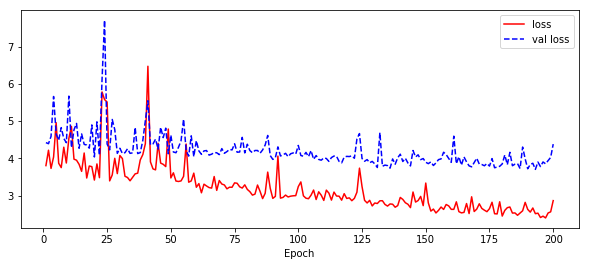

acc


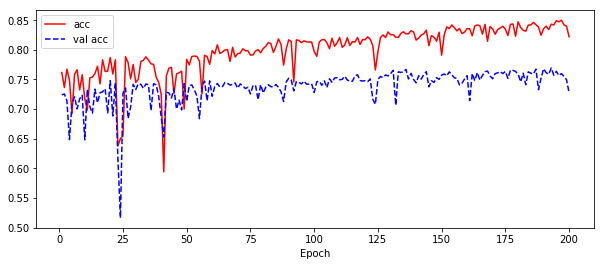

In [88]:
import datetime
import numpy as np

def plot_history(hist_path, metric):
    print(metric)
    hist = load_serialized_object(hist_path)

    plt.plot(range(1, 1+len(hist[metric])), hist[metric], label=metric, color='r')
    plt.plot(range(1, 1+len(hist['val_%s' %  metric])), hist['val_%s' % metric], label='val %s' % metric, linestyle='--', color='b')
    plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 4]

print('GENDER')
ft1_hist_path_gender = data_path('codalab', '224_224', 'model_sigmoid', 'gender', 'vgg16', 'ft','1', 'hist.pkl')
time_path = data_path('codalab', '224_224', 'model_sigmoid', 'gender', 'vgg16', 'ft','1', 'time.pkl')
time = load_serialized_object(time_path)
print(str(datetime.timedelta(seconds=time)))
print(np.max(load_serialized_object(ft1_hist_path_gender)['val_acc']))
plot_history(ft1_hist_path_gender, 'loss')
plot_history(ft1_hist_path_gender, 'acc')


print('SMILE')
ft1_hist_path_smile = data_path('codalab', '224_224', 'model_sigmoid', 'smile', 'vgg16', 'ft','1', 'hist.pkl')
time_path = data_path('codalab', '224_224', 'model_sigmoid', 'smile', 'vgg16', 'ft','1', 'time.pkl')
time = load_serialized_object(time_path)
print(str(datetime.timedelta(seconds=time)))
print(np.max(load_serialized_object(ft1_hist_path_smile)['val_acc']))
plot_history(ft1_hist_path_smile, 'loss')
plot_history(ft1_hist_path_smile, 'acc')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
_________________________________________________________________
block3_conv2 (Conv2D)        (None, 56, 56, 256)       590080    
_________________________________________________________________
block3_conv3 (Conv2D)        (None, 56, 56, 256)       590080    
_________________________________________________________________
block3_pool (MaxPooling2D)   (None, 28, 28, 256)       0         
_________________________________________________________________
block4_conv1 (Conv2D)        (None, 28, 28, 512)       1180160   
_________________________________________________________________
block4_conv2 (Conv2D)        (None, 28, 28, 512)       2359808   
_________________________________________________________________
block4_conv3 (Conv2D)        (None, 28, 28, 512)       2359808   
_________________________________________________________________
block4_pool (MaxPooling2D)   (None, 14, 14, 512)       0         
_________________________________________________________________
block5_conv1 (Conv2D)        (None, 14, 14, 512)       2359808   
_________________________________________________________________
block5_conv2 (Conv2D)        (None, 14, 14, 512)       2359808   
_________________________________________________________________
block5_conv3 (Conv2D)        (None, 14, 14, 512)       2359808   
_________________________________________________________________
block5_pool (MaxPooling2D)   (None, 7, 7, 512)         0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 3)                 6456067   
=================================================================
Total params: 21,170,755
Trainable params: 8,815,875
Non-trainable params: 12,354,880
_________________________________________________________________

## Early layers features

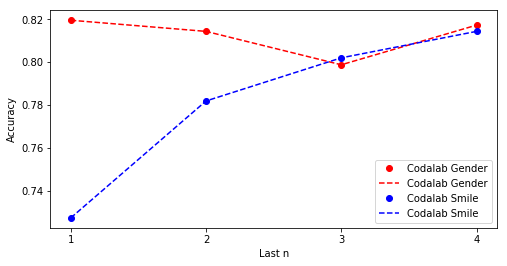

In [90]:
import numpy as np
from matplotlib.ticker import MaxNLocator

last_n = [1,2,3, 4]
def plot_max_val_acc(max_acc_gender, max_acc_smile):
    plt.rcParams["figure.figsize"] = [8, 4]
    plt.figure().gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.plot(last_n, max_acc_gender.values(), 'ro', label='Codalab Gender')
    plt.plot(last_n, max_acc_gender.values(), 'r--', label='Codalab Gender')
    plt.plot(last_n, max_acc_smile.values(), 'bo', label='Codalab Smile')
    plt.plot(last_n, max_acc_smile.values(), 'b--', label='Codalab Smile')
    plt.xlabel('Last n')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

max_acc_smile = {}
max_acc_gender = {}
for n in last_n:
    last_n_path_smile = data_path('codalab', '224_224', 'model', 'smile', 'vgg16', 'early', '%s', 'hist.pkl') % n 
    last_n_path_gender = data_path('codalab', '224_224', 'model', 'gender', 'vgg16', 'early', '%s', 'hist.pkl') % n 
    last_n_path_hist_smile = load_serialized_object(last_n_path_smile)
    last_n_path_hist_gender = load_serialized_object(last_n_path_gender)
    max_acc_smile[n] = np.max(last_n_path_hist_smile['val_acc'])
    max_acc_gender[n] = np.max(last_n_path_hist_gender['val_acc'])
    
plot_max_val_acc(max_acc_gender, max_acc_smile)

In [68]:
tasks = ['gender', 'smile']
last_n = [1,2,3,4]
for task in tasks:
    for n in last_n:
        print('%s_%s' % (task, n))
        time_path = data_path('codalab', '224_224', 'model', task, 'vgg16', 'early', str(n), 'time.pkl')
        time = load_serialized_object(time_path)
        print(str(datetime.timedelta(seconds=time)))

gender_1
0:20:59
gender_2
0:20:21
gender_3
0:21:15
gender_4
0:25:38
smile_1
0:20:39
smile_2
0:13:48
smile_3
0:13:49
smile_4
0:25:36
